# EDA on Employee Dataset

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)


In [93]:
Data = pd.read_csv(r"C:\Users\Deepak Chaudhary\Downloads\test1.csv")
Data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,Travel_Rarely,790,Sales,24,4,Medical,1489,1,Female,40,2,Sales Executive,2,Single,4599,0,Y,Yes,23,4,2,4,15,9,10,10
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1492,4,Male,76,1,Sales Representative,3,Married,2404,1,Y,No,13,3,3,3,1,0,0,0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1494,2,Male,89,1,Laboratory Technician,1,Single,3172,2,Y,Yes,11,3,2,2,0,0,0,0
3,24,Non-Travel,830,Sales,13,2,Life Sciences,1495,4,Female,78,1,Sales Representative,2,Married,2033,1,Y,No,13,3,2,3,1,0,0,0
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,1496,2,Male,86,3,Manufacturing Director,3,Single,10209,5,Y,Yes,18,3,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,36,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,41,2,Laboratory Technician,4,Married,2571,4,Y,No,17,3,3,3,5,2,0,3
408,39,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,42,3,Healthcare Representative,1,Married,9991,4,Y,No,15,3,5,3,7,7,1,7
409,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,87,2,Manufacturing Director,2,Married,6142,1,Y,Yes,20,4,0,3,6,2,0,3
410,49,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,63,2,Sales Executive,2,Married,5390,2,Y,No,14,3,3,2,9,6,0,8


## ->Which age group travels the most?

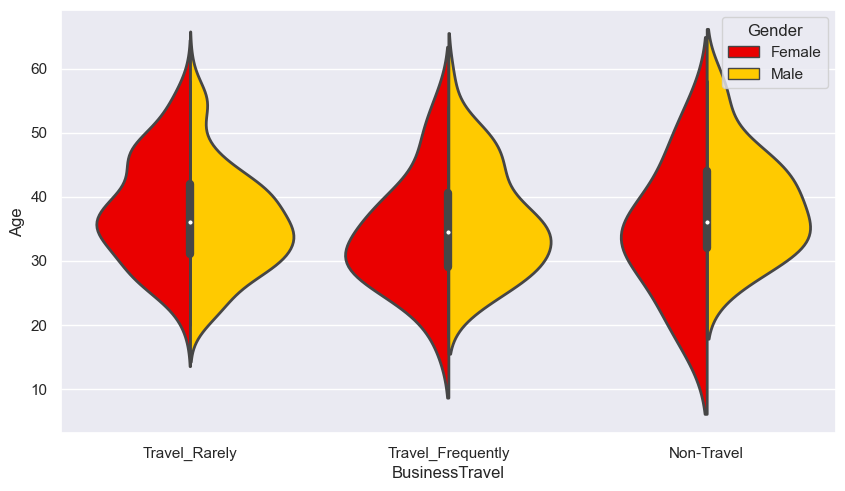

In [88]:
sns.set(style = 'darkgrid')
sns.violinplot(x = 'BusinessTravel',y = 'Age',data = Data,palette = 'hot',saturation = 20,linewidth = 2,hue = 'Gender',split = True)
plt.show()

### Clearly the age group(30-40) travels the most

## ->Which Department travels the most

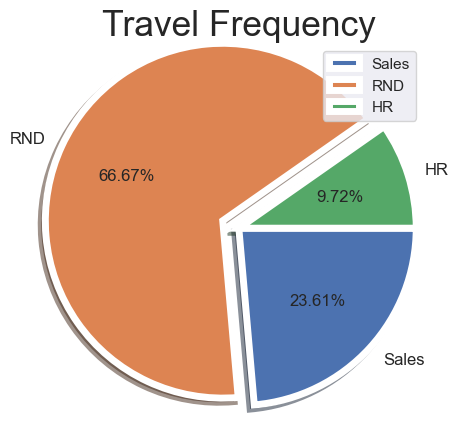

In [79]:
dep = Data['Department'].unique().tolist()
sales_dep = Data.loc[Data[(Data['BusinessTravel']=='Travel_Frequently') & (Data['Department']=='Sales')].index.values].index.values.tolist()
RND_dep = Data.loc[Data[(Data['BusinessTravel']=='Travel_Frequently') & (Data['Department']=='Research & Development')].index.values].index.values.tolist()
HR_dep = Data.loc[Data[(Data['BusinessTravel']=='Travel_Frequently') & (Data['Department']=='Human Resources')].index.values].index.values.tolist()

res = [len(sales_dep),len(RND_dep),len(HR_dep)]
lang = ['Sales','Research & Development','Human Resources']
ex = [0.0,0.12,0.0]
lang = ['Sales','RND','HR']
plt.pie(res,labels = lang,explode = ex,autopct = '%0.2f%%',shadow = True,radius = 1.2,startangle = 0,textprops={'fontsize':12},counterclock = False,wedgeprops = {'linewidth':5} )
plt.title("Travel Frequency",fontsize = 25.5)
plt.legend(loc=1)
plt.show()

### Research and Development department travels the most 

## Suppose the company wants to offer the pickup facilities for the employees having distance from home more than or equal to 20km

## ->Divide the Employees on the basis of DistanceFromHome parameter, range(1-5,5-10,10-15,15-20,20-25,25-30)Kms

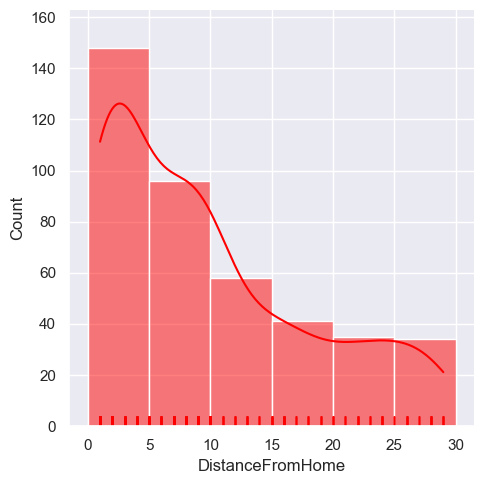

In [80]:
sns.displot(Data['DistanceFromHome'],bins = [0,5,10,15,20,25,30],kde = True,rug = True,color = "red")
plt.show()
plt.show()

## Are Employees satisfied with their working environment

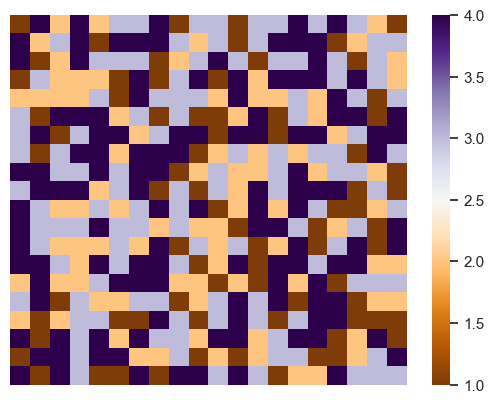

In [81]:
y = Data.EnvironmentSatisfaction.tolist()
var = np.array(y[0:400]).reshape(20,20)
sns.heatmap(var,cmap = 'PuOr',xticklabels = False,yticklabels = False)
plt.show()

### We can't say majority of the employees are satisfied with their working environments

## Which Department's employees are satisfied more with their working environment

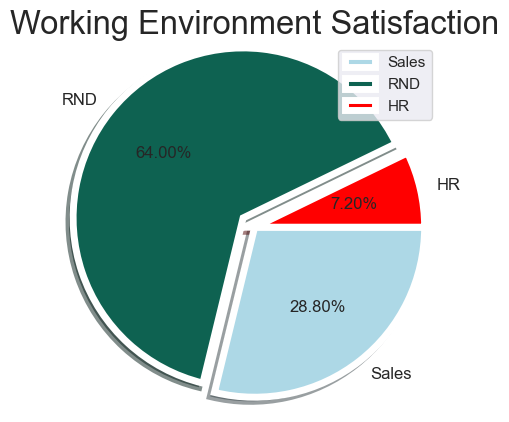

In [82]:
sales_dep = Data.loc[Data[(Data['Department']=='Sales') & (Data['EnvironmentSatisfaction']>=3)].index.values].index.values
RND_dep = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EnvironmentSatisfaction']>=3)].index.values].index.values
HR_dep = Data.loc[Data[(Data['Department']=='Human Resources') & (Data['EnvironmentSatisfaction']>=3)].index.values].index.values

res = [len(sales_dep),len(RND_dep),len(HR_dep)]
ex = [0.0,0.1,0.0]
lang = ['Sales','RND','HR']
plt.pie(res,labels = lang,colors = ['lightblue','#0e6251','red'],explode = ex,autopct = '%0.2f%%',shadow = True,radius = 1.15,startangle = 0,textprops={'fontsize':12},counterclock = False,wedgeprops = {'linewidth':5} )
plt.title("Working Environment Satisfaction",fontsize = 23.5)
plt.legend(loc=1)
plt.show()

## Employees who travels frequently are able to maintain their work life balance or not

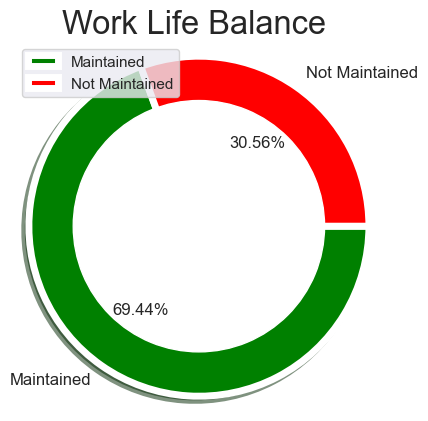

In [83]:
x1 = Data.loc[Data[(Data['BusinessTravel']=='Travel_Frequently') & (Data['WorkLifeBalance']>=3)].index.values].index.values
x2 = Data.loc[Data[(Data['BusinessTravel']=='Travel_Frequently') & (Data['WorkLifeBalance']<3)].index.values].index.values
res = [len(x1),len(x2)]
lang = ['Maintained','Not Maintained']
c = ['green','red']
ex = [0.0,0.0]
plt.pie(res,labels = lang,explode = ex,colors = c,autopct = '%0.2f%%',shadow = True,radius = 1.15,startangle = 0,textprops={'fontsize':12},counterclock = False,wedgeprops = {'linewidth':5} )
plt.pie([1],colors = 'white',radius = 0.85)
plt.title("Work Life Balance ",fontsize = 23.5)
plt.legend(loc=2)
plt.show()

### Around 69.44% employees who travels frequently are able to maintain their work life balance 

## Employees that are married and travels frequently are able to  maintain their work life balance or not

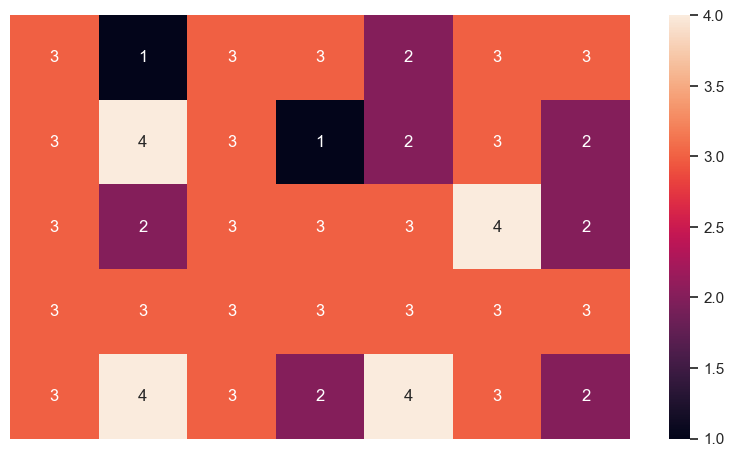

In [105]:
x = Data.loc[Data[(Data['BusinessTravel']=='Travel_Frequently') & (Data['MaritalStatus']=='Married')].index.values,'WorkLifeBalance'].tolist()
y = np.array(x).reshape(5,7)
sns.heatmap(y,xticklabels = False,yticklabels = False,annot = True)
plt.show()

### Through the heatmap it is clear that married employees are managing their work life balance somehow

## What are the chances to get into the Research and Development Department on the basis of education 

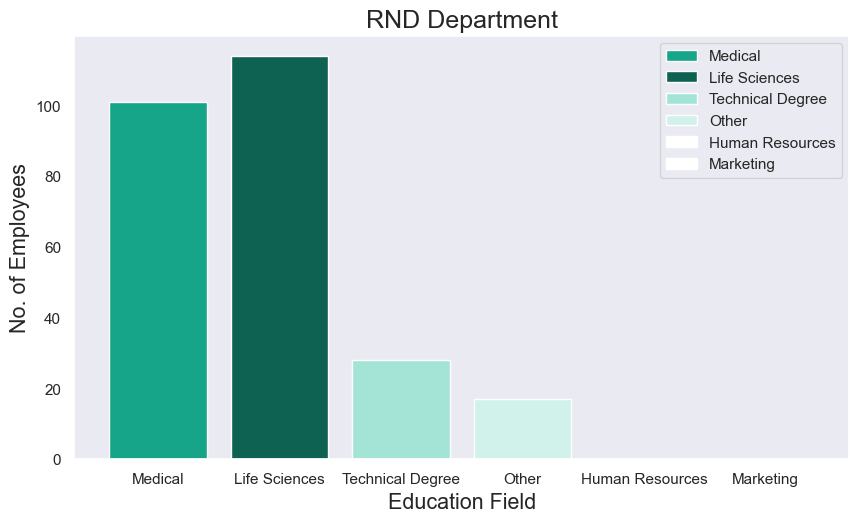

In [84]:
# ['Medical', 'Life Sciences', 'Technical Degree', 'Other','Human Resources', 'Marketing']
y1 = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EducationField']=='Medical')].index.values].index.values
y2 = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EducationField']=='Life Sciences')].index.values].index.values
y3 = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EducationField']=='Technical Degree')].index.values].index.values
y4 = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EducationField']=='Other')].index.values].index.values
y5 = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EducationField']=='Human Resources')].index.values].index.values
y6 = Data.loc[Data[(Data['Department']=='Research & Development') & (Data['EducationField']=='Marketing')].index.values].index.values
res = [len(y1),len(y2),len(y3),len(y4),len(y5),len(y6)]
lab = ['Medical','Life Sciences','Technical Degree','Other','Human Resources','Marketing']
plt.rcParams['figure.figsize']=(10,5.5)
plt.bar(lab,res,color = ['#17a589','#0e6251','#a3e4d7','#d1f2eb','white','white'],label = ['Medical','Life Sciences','Technical Degree','Other','Human Resources','Marketing'])
plt.legend()
plt.xlabel('Education Field',fontsize = 15.5)
plt.ylabel('No. of Employees',fontsize = 15.5)
plt.title("RND Department",fontsize = 18)
plt.grid()
plt.show()

## Number of Employees in a particular department

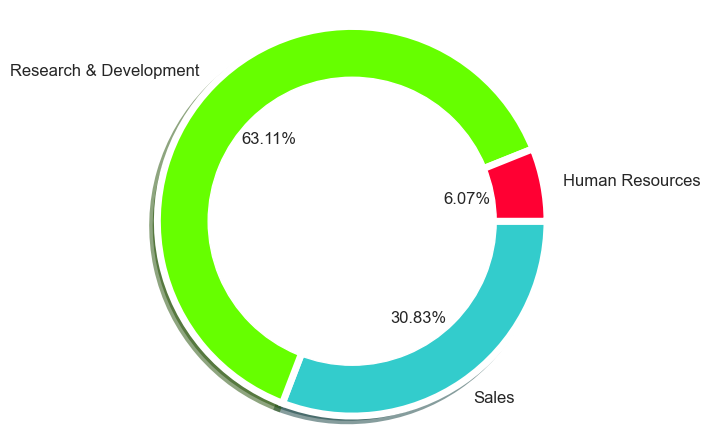

In [85]:
dep = Data["Department"].unique().tolist()
x1 = [len(Data.loc[Data[Data.Department ==i].index.values].index.values) for i in dep]
plt.pie(x1,labels = dep,colors=['#33cccc','#66ff00','#ff0033'],autopct = '%0.2f%%',shadow = True,radius = 1.15,startangle = 0,textprops={'fontsize':12},counterclock = False,wedgeprops = {'linewidth':5})
plt.pie([1],radius = 0.85,colors = 'white')
plt.show()

### Around 63% of the Employees are working in Research & Development Department

## Which Department's Employees were more engaged in training last year

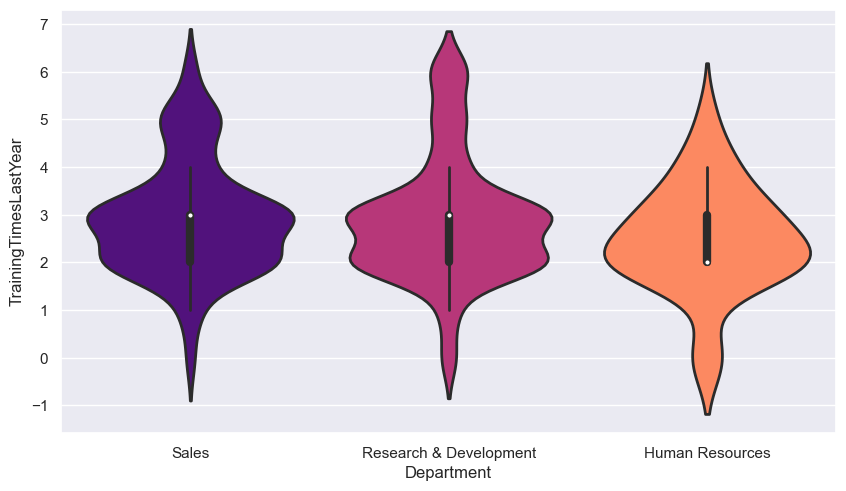

In [86]:
sns.violinplot(x = 'Department',y = 'TrainingTimesLastYear',data = Data,palette = 'magma',saturation = 20,linewidth = 2)
plt.show()

### Sales Department employees were more engaged in Trainings last year

array(['Medical', 'Life Sciences', 'Technical Degree', 'Other',
       'Human Resources', 'Marketing'], dtype=object)